In [1]:
import pandas as pd
import numpy as np
from PyKomoran import Komoran
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

In [2]:
#데이터 프레임을 읽어오기
df = pd.read_csv('LINE_data.csv')

In [3]:
#메세지가 담긴 컬럼을 저장
message_column = df['Message']

In [4]:
#Komaran 객체를 생성
komoran = Komoran("EXP")

In [20]:
#토큰을 리스트에 저장
tokens = []
for text in tqdm(message_column, desc='Tokenizing'): #tqdm
    token = komoran.get_plain_text(text) #토큰을 지정된 형태로 뽑음 '① 대한민국은 민주공화국이다.' -> '①/SW 대한민국/NNP 은/JX 민주/NNP 공화국/NNG 이/VCP 다/EF ./SF'
    tokens.extend([word.split('/')[0] for word in token.split() if '/NNP' in word or '/NNG' in word]) #지정된 형태에서 명사와 고유명사만을 추출 -> ['대한민국', '민주', '공화국']

Tokenizing: 100%|██████████| 474706/474706 [01:44<00:00, 4547.28it/s]


In [22]:
tokens = [item for item in tokens if item not in ['사진', '스티커']] #채팅 로그에서 모든 이미지 전송을 [사진]으로 표시하므로 제거함. [스티커]는 이모티콘.

In [33]:
#토큰 빈도 계산
token_freq = pd.Series(tokens).value_counts()

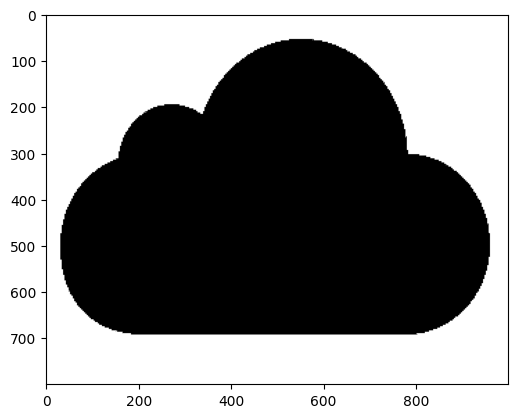

In [34]:
from PIL import Image

icon = Image.open('cloud.png').convert('RGBA')    # 마스크가 될 이미지 불러오기 
plt.imshow(icon)

mask = Image.new("RGBA", icon.size, (255,255,255,0))
mask.paste(icon, (0,0), icon)
mask = np.array(mask)

In [35]:
#워드 클라우드 생성
wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf', background_color='white', width=900, height=600, mask=mask)
wc.generate_from_frequencies(token_freq)

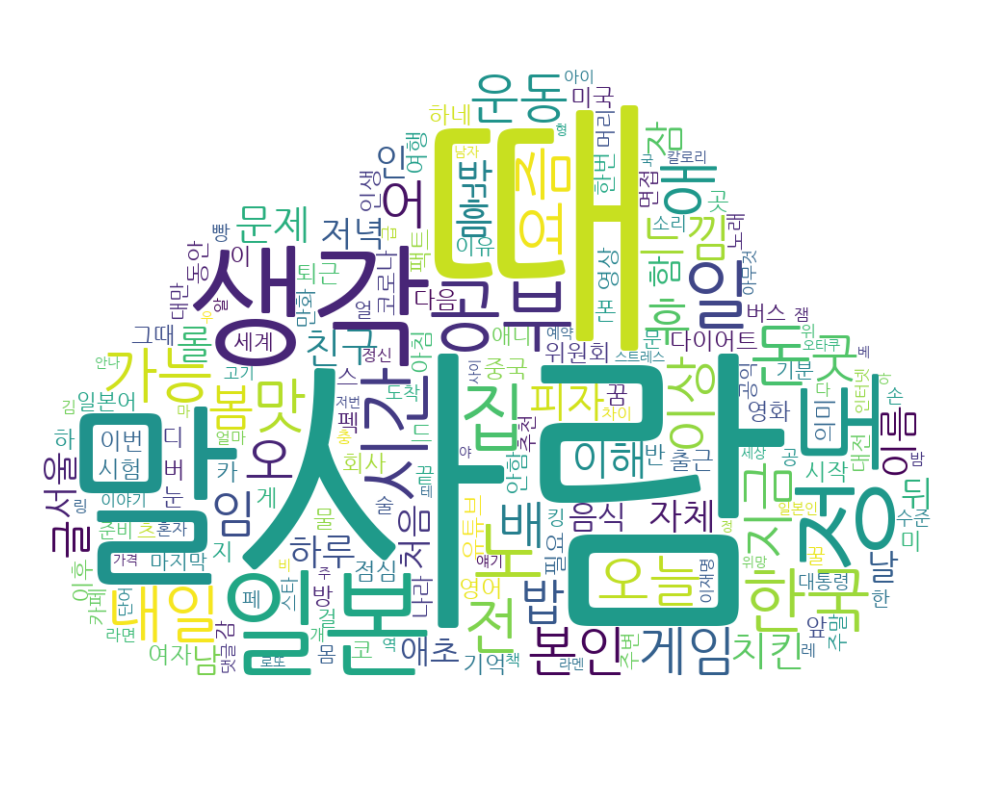

In [36]:
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
my_column = df.loc[df['Sender'] == 'LSN', 'Message']

In [9]:
#토큰을 리스트에 저장
my_tokens = []
for text in tqdm(my_column, desc='Tokenizing'): #내가 말한 내역만 추출
    token = komoran.get_plain_text(text) #토큰을 지정된 형태로 뽑음 '① 대한민국은 민주공화국이다.' -> '①/SW 대한민국/NNP 은/JX 민주/NNP 공화국/NNG 이/VCP 다/EF ./SF'
    my_tokens.extend([word.split('/')[0] for word in token.split() if '/NNP' in word or '/NNG' in word]) #지정된 형태에서 명사와 고유명사만을 추출 -> ['대한민국', '민주', '공화국']

Tokenizing: 100%|██████████| 184509/184509 [00:41<00:00, 4417.01it/s]


In [11]:
my_tokens = [item for item in my_tokens if item not in ['사진', '스티커']] #채팅 로그에서 모든 이미지 전송을 [사진]으로 표시하므로 제거함. [스티커]는 이모티콘.

In [44]:
my_token_freq = pd.Series(my_tokens).value_counts()

In [45]:
#워드 클라우드 생성
my_wc = WordCloud(font_path='C:/Windows/Fonts/NanumGothic.ttf', background_color='white', width=900, height=600, mask=mask)
my_wc.generate_from_frequencies(my_token_freq)

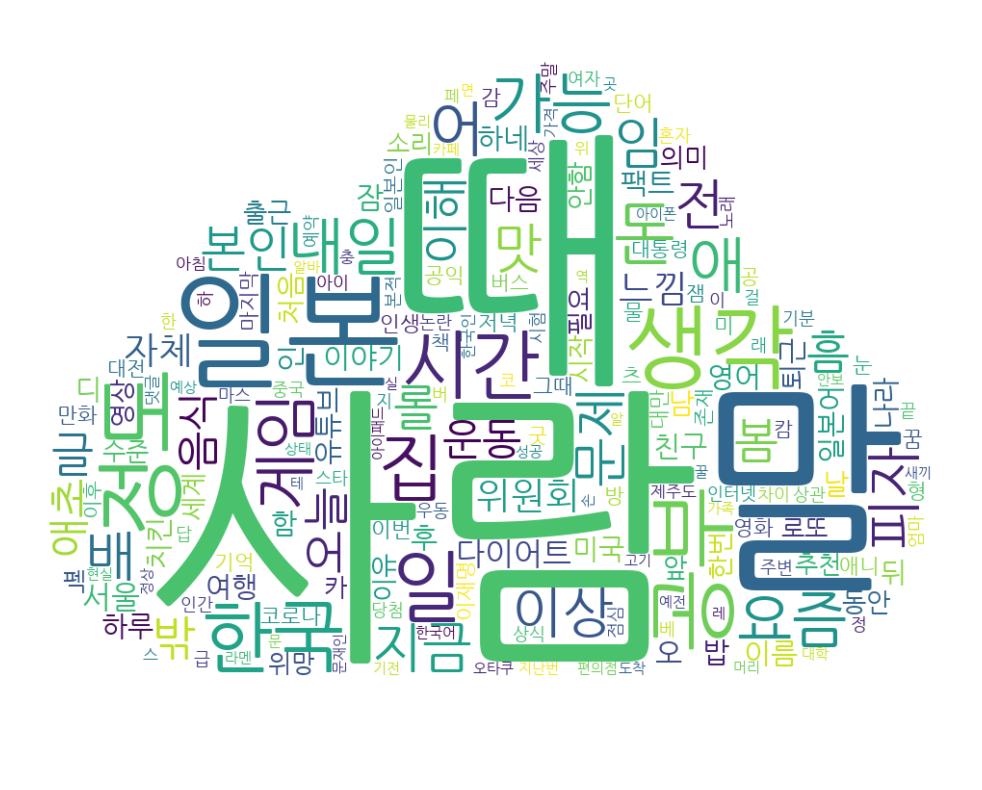

In [47]:
plt.figure(figsize=(10, 8))
plt.imshow(my_wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()